In [7]:
# Import data from /dataset/

import pandas as pd
import numpy as np

team_id = '20' #put your team id here
split = 'test_1' # replace by 'test_2' for FINAL submission

df = pd.read_csv('dataset/tweets_train.csv')
df_test = pd.read_csv(f'dataset/tweets_{split}.csv')

In [2]:
df.head()

,id,text,type,author_id,possibly_sensitive,retweet_count,quote_count,reply_count,like_count,followers_count,following_count,tweet_count,listed_count,words,score_compound,sentiment
0,1532325760148590593,@xbresson British Alps :-),replied_to,62044012,False,0,0,1,2,33022,3383,5246,359,"['british', 'alps']",0.0000,neutral
1,1312410689059913731,RT @Aistats2020: Videos presentations of paper...,retweeted,1290762290224984064,False,52,0,0,0,17570,541,703,222,"['videos', 'presentations', 'papers', 'keynote...",0.0000,neutral
2,1564467011781926913,I hope I would be able to talk more about this...,quoted,3363584909,False,1,0,0,3,65506,113,15406,856,"['hope', 'would', 'able', 'talk', 'balcony', '...",0.4862,neutral
3,1473395733344788481,RT @dlbcnai: Keynote by Joan Bruna (@joanbruna...,retweeted,1071640880,False,35,0,0,0,21847,555,1346,264,"['keynote', 'joan', 'bruna', 'geometric', 'dee...",0.3612,neutral
4,1611495430843502593,@annargrs @Michael_J_Black @AllenHW0 @CSProfKG...,replied_to,48008938,False,0,0,1,5,427851,582,12949,6488,"['process', 'science', 'relies', 'much', 'basi...",-0.3182,neutral


In [34]:
df_test.head()

,id,text,type,author_id,possibly_sensitive,retweet_count,quote_count,reply_count,like_count,followers_count,following_count,tweet_count,listed_count,words
0,1594715340231290880,"You allege, @ylecun. that there are zero cases...",quoted,232294292,False,6,2,8,61,86646,5312,26291,2422,"['allege', 'zero', 'cases', 'llms', 'created',..."
1,1549261742349291520,I've scanned the TOC and Introduction and I ha...,quoted,3363584909,False,3,0,1,29,65506,113,15406,856,"['scanned', 'toc', 'introduction', 'strong', '..."
2,1353027631130832896,Automatic differentiation is really pretty fan...,tweet,175624200,False,41,5,13,557,1031629,225,16316,6967,"['automatic', 'differentiation', 'really', 'pr..."
3,1603885102890733569,@__lucab Rienzi is especially great,replied_to,62044012,False,0,0,0,0,33022,3383,5246,359,"['rienzi', 'especially', 'great']"
4,1544232610343243776,To complete my story about the Kielce Pogrom\n...,quoted,3363584909,False,0,0,1,14,65506,113,15406,856,"['complete', 'story', 'kielce', 'pogrom', 'pic..."


In [3]:
# Count the number of dataset
df.count()

id                    8000
text                  8000
type                  8000
author_id             8000
possibly_sensitive    8000
retweet_count         8000
quote_count           8000
reply_count           8000
like_count            8000
followers_count       8000
following_count       8000
tweet_count           8000
listed_count          8000
words                 8000
score_compound        8000
sentiment             8000
dtype: int64

In [4]:
df['words_str'] = df['words'].apply(lambda words: ' '.join(eval(words)))
df_test['words_str'] = df_test['words'].apply(lambda words: ' '.join(eval(words)))

In [5]:
df_pos = df[df.sentiment == 'positive']
df_neu = df[df.sentiment == 'neutral']
df_neg = df[df.sentiment == 'negative']


num_total = len(df)
num_pos = len(df_pos)
num_neu = len(df_neu)
num_neg = len(df_neg)

print(f"Num. positive tweets: {num_pos} ({num_pos/num_total*100:.2f}%)")
print(f"Num. negative tweets: {num_neg} ({num_neg/num_total*100:.2f}%)")
print(f"Num. neutral tweets: {num_neu} ({num_neu/num_total*100:.2f}%)")


Num. positive tweets: 2228 (27.85%)
Num. negative tweets: 482 (6.02%)
Num. neutral tweets: 5290 (66.12%)


In [2]:
# Check the range of the values score_compound column
df['score_compound'].describe()

count    8000.000000
mean        0.234368
std         0.453699
min        -0.964000
25%         0.000000
50%         0.273200
75%         0.618700
max         0.985300
Name: score_compound, dtype: float64

<Axes: xlabel='new_score_compound', ylabel='score_compound'>

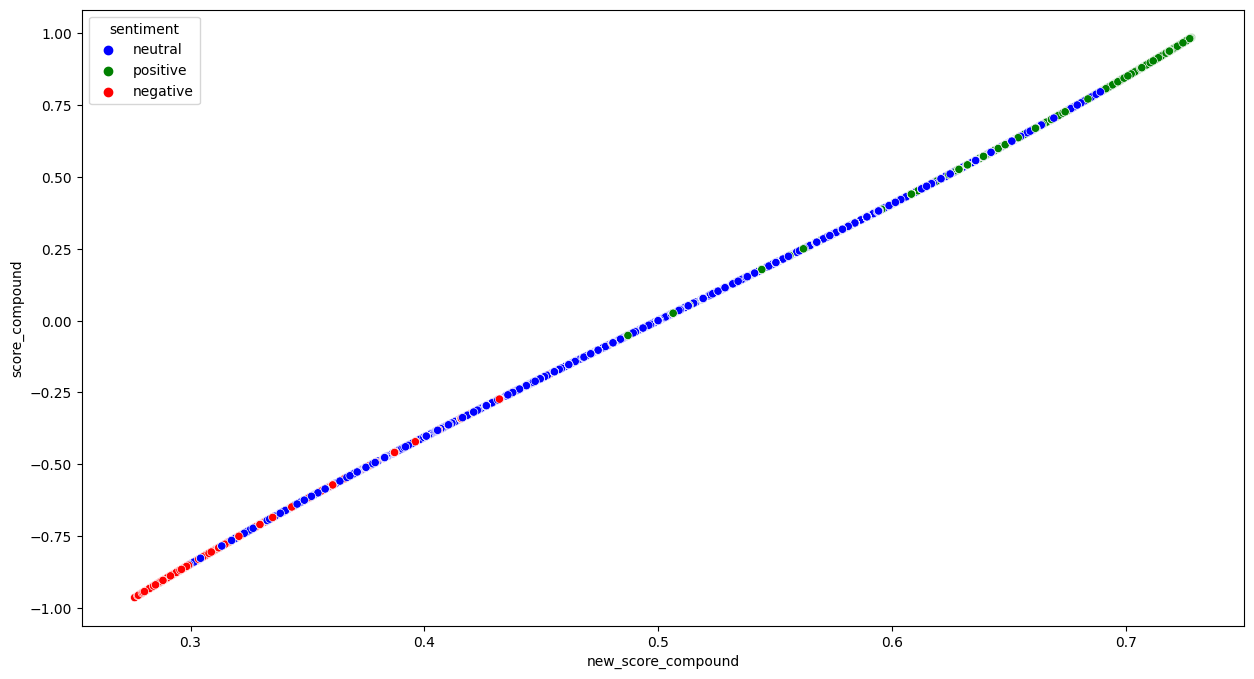

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Plot the score_compound in a numberline coloring them using the sentiment column
# The sentiment column is a categorical column with 3 values: positive, neutral and negative
# The score_compound column is a numerical column with values between -1 and 1
# The score_compound column is the result of the sentiment analysis

# New datafarame with a new column called new_score_compound 
# The new_score_compound column = sigmoid(score_compound)

df_plot = df.copy()
df_plot['new_score_compound'] = df_plot['score_compound'].apply(lambda x: 1/(1+np.exp(-x)))

# Create plot
plt.figure(figsize=(15,8))
sns.scatterplot(x=df_plot.new_score_compound, y=df_plot['score_compound'], hue=df_plot['sentiment'], palette=['blue', 'green', 'red'])


In [30]:
df_plot.head(10)

,id,text,type,author_id,possibly_sensitive,retweet_count,quote_count,reply_count,like_count,followers_count,following_count,tweet_count,listed_count,words,score_compound,sentiment,new_score_compound
0,1532325760148590593,@xbresson British Alps :-),replied_to,62044012,False,0,0,1,2,33022,3383,5246,359,"['british', 'alps']",0.0000,neutral,0.500000
1,1312410689059913731,RT @Aistats2020: Videos presentations of paper...,retweeted,1290762290224984064,False,52,0,0,0,17570,541,703,222,"['videos', 'presentations', 'papers', 'keynote...",0.0000,neutral,0.500000
2,1564467011781926913,I hope I would be able to talk more about this...,quoted,3363584909,False,1,0,0,3,65506,113,15406,856,"['hope', 'would', 'able', 'talk', 'balcony', '...",0.4862,neutral,0.619211
3,1473395733344788481,RT @dlbcnai: Keynote by Joan Bruna (@joanbruna...,retweeted,1071640880,False,35,0,0,0,21847,555,1346,264,"['keynote', 'joan', 'bruna', 'geometric', 'dee...",0.3612,neutral,0.589331
4,1611495430843502593,@annargrs @Michael_J_Black @AllenHW0 @CSProfKG...,replied_to,48008938,False,0,0,1,5,427851,582,12949,6488,"['process', 'science', 'relies', 'much', 'basi...",-0.3182,neutral,0.421114
5,1228672069333848064,RT @geoffreyhinton: Unsupervised learning of r...,retweeted,1071640880,False,519,0,0,0,21847,555,1346,264,"['unsupervised', 'learning', 'representations'...",0.3384,neutral,0.583802
6,1595340090963857410,"@prem_k Relax, it's a joke!",replied_to,48008938,False,0,0,2,2,427851,582,12949,6488,"['relax', 'joke']",0.6249,positive,0.651332
7,1585623984858869765,Postdoctoral position available in Computation...,tweet,62044012,False,18,1,0,68,33022,3383,5246,359,"['postdoctoral', 'position', 'available', 'com...",0.4404,neutral,0.608354
8,1529505378911891457,@textfiles I did note the irony of being somew...,replied_to,175624200,False,0,0,2,20,1031629,225,16316,6967,"['note', 'irony', 'somewhat', 'phone', 'phreak...",-0.3969,neutral,0.402057
9,1624987333522239489,@repligate @reality__gamer are you sure it nev...,replied_to,232294292,False,0,0,2,0,86646,5312,26291,2422,"['sure', 'never', 'made', 'illegal', 'moves', ...",0.4449,positive,0.609426


<Axes: xlabel='new_score_compound', ylabel='score_compound'>

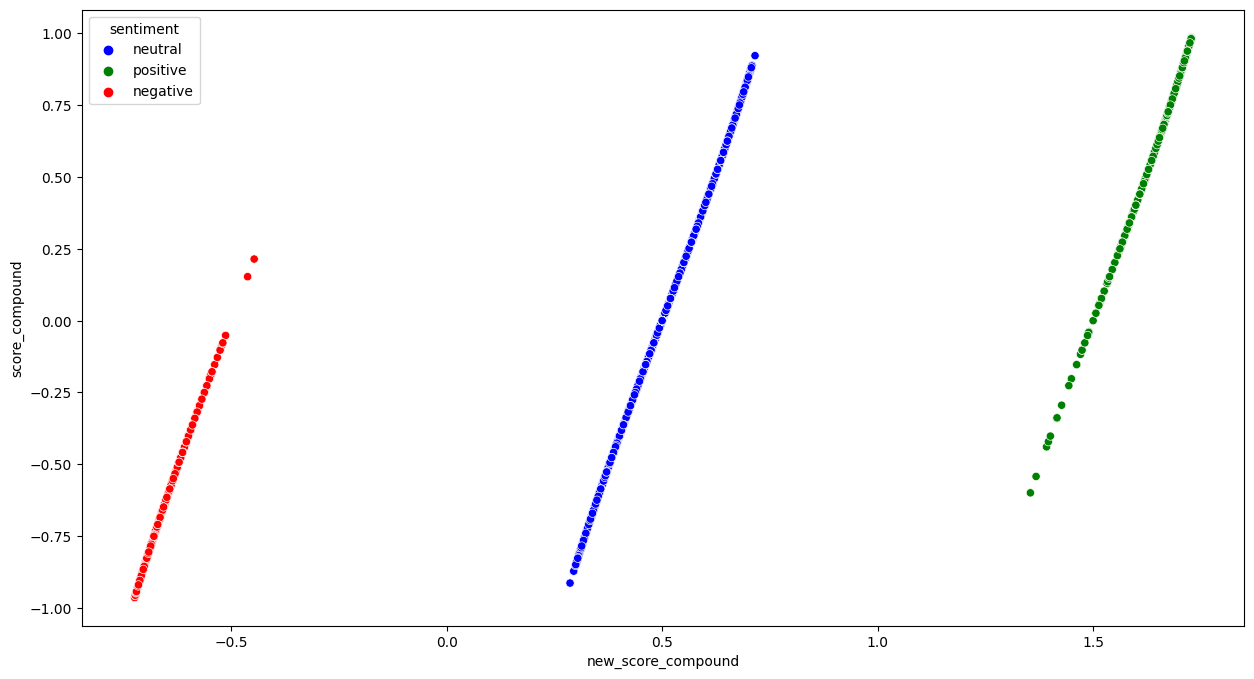

In [31]:
# Now if sentiment is positive then in new_score_compound = new_score_compound + 1
# If sentiment is negative then in new_score_compound = new_score_compound - 1
# If sentiment is neutral then in new_score_compound = new_score_compound + 0from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Iterate over df_plot dataframe
for index, row in df_plot.iterrows():
    # Get the sentiment score of the tweet
    new_score_compound = row['new_score_compound']
    # Get the sentiment of the tweet
    new_sentiment = row['sentiment']
    # If sentiment is positive then in new_score_compound = new_score_compound + 1
    if new_sentiment == 'positive':
        new_score_compound = new_score_compound + 1
    # If sentiment is negative then in new_score_compound = new_score_compound - 1
    elif new_sentiment == 'negative':
        new_score_compound = new_score_compound - 1
    # If sentiment is neutral then in new_score_compound = new_score_compound + 0
    else:
        new_score_compound = new_score_compound + 0
    # Update the new_score_compound column with new_score_compound
    df_plot.loc[index, 'new_score_compound'] = new_score_compound


# Create plot
plt.figure(figsize=(15,8))
sns.scatterplot(x=df_plot.new_score_compound, y=df_plot['score_compound'], 
hue=df_plot['sentiment'], palette=['blue', 'green', 'red'])


In [33]:
# Save dataframe to dataset directory
df_plot.to_csv('dataset/tweets_train_sigmoid.csv', index=False)

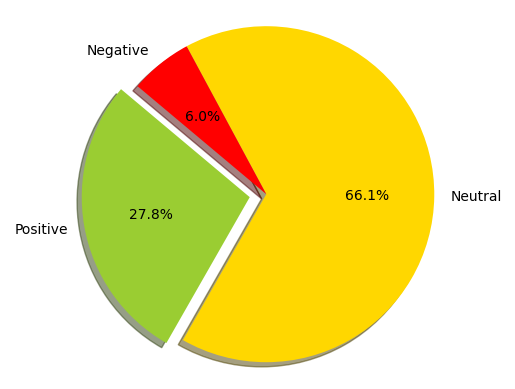

In [6]:
# Import matplotlib
import matplotlib.pyplot as plt

# Plot the sentiments in a pie chart

labels = ['Positive', 'Neutral', 'Negative']

sizes = [num_pos, num_neu, num_neg]

colors = ['yellowgreen', 'gold', 'red']

explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


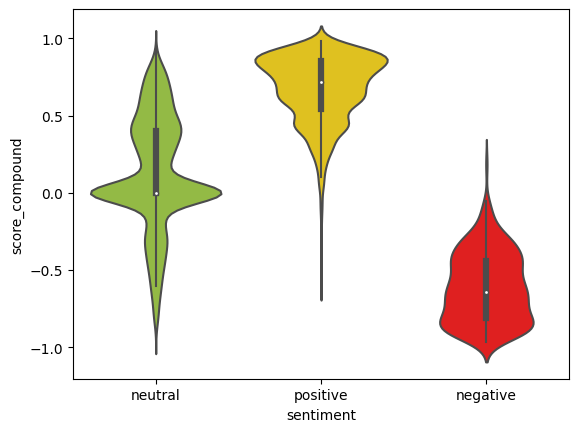

In [7]:
# Import seaborn
import seaborn as sns

# Plot violinplot

plt.close('all')

sns.violinplot(data=df, x='sentiment', y='score_compound', palette=colors)
plt.show()

In [8]:
from sentence_transformers import SentenceTransformer

# Specify the model name
# I downloaded in models directory three models: 
# all-MiniLM-L6-v2(Fastest but smalles), stsb-roberta-base-v2(middle), and stsb-mpnet-base-v2(Slowest, but best performance)

name = 'all-MiniLM-L6-v2'

# Load the SentenceTransformer model
model = SentenceTransformer(f'models/{name}')


Extra link for model rankings:
https://www.sbert.net/docs/pretrained_models.html

In [9]:
# List of sentences to get embeddings for
sentences = list(df.words_str.values)

# Get the sentence embeddings
sentence_embeddings = model.encode(sentences)

Regression

In [10]:
#define some functions for plotting purposes

def plot_y_continous(y, bins=10, show=True, title=None):
    fig, ax = plt.subplots(1, 1)
    _ = ax.hist(y, bins=bins)
    if isinstance(title, str):
        ax.set_title(title)
    plt.tight_layout()
    if show: plt.show()

def plot_scatter(x, y,  show=True, x_label=None, y_label=None,  title=None):
    fig, ax = plt.subplots(1, 1)
    _ = ax.scatter(x,y)
    if isinstance(title, str):
        ax.set_title(title)
    if isinstance(x_label, str):
        ax.set_xlabel(x_label)
    if isinstance(y_label, str):
        ax.set_ylabel(y_label)
    plt.tight_layout()
    if show: plt.show()
    

In [11]:
#create X (feature matrix) and y (targets)
X = sentence_embeddings
y = df.score_compound.values
print(f"X: {X.shape}")
print(f"y: {y.shape}")

X: (8000, 384)
y: (8000,)


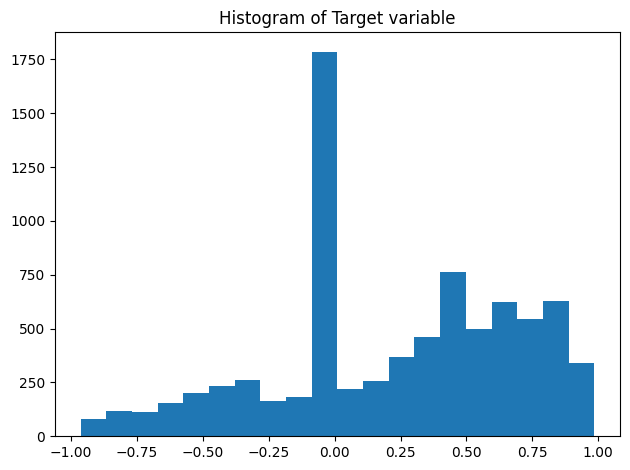

In [12]:
plt.close('all')
plot_y_continous(y, bins=20, title='Histogram of Target variable')

In [13]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm
import numpy as np

In [14]:
#split X and y for training and validation purposes
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

datasets = [
    [X_train, y_train],
    [X_val, y_val]
]

#create our linear regression model
reg = linear_model.LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

In [15]:
reg = reg.fit(X_train, y_train)

In [16]:
# Evaluate our predictor quantitatively
for split_name, dataset in zip(['train', 'valididation'], datasets):
    X_i, y_i = dataset
    y_pred = reg.predict(X_i)

    rmse = np.sqrt(skm.mean_squared_error(y_i, y_pred))
    print(f'\nSplit: {split_name}')
    print(f"\tRMSE: {rmse:.2f}")
    mae = skm.mean_absolute_error(y_i, y_pred)
    print(f"\tMAE: {mae:.2f}")


Split: train
	RMSE: 0.33
	MAE: 0.26

Split: valididation
	RMSE: 0.34
	MAE: 0.27


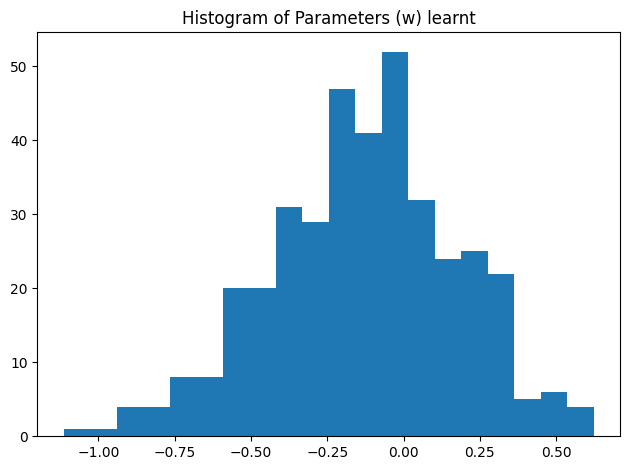

In [17]:
#plot the histogram of learnt weights w_i 
plot_y_continous(reg.coef_, bins=20, title='Histogram of Parameters (w) learnt')

For test data

In [18]:
# Run this to save a file with your predictions on the test set to be submitted
sentences_test = list(df_test.words_str.values)
X_test = model.encode(sentences_test)
y_hat = reg.predict(X_test)

In [19]:
# Save the results with the format <TEAM_ID>__<SPLIT>_reg_pred.npy
import os

directory = 'results'
np.save(os.path.join(directory, f'{team_id}__{split}__reg_pred.npy'), y_hat)

Classification

In [20]:
from sklearn import linear_model
from sklearn import preprocessing

In [21]:
def plot_y_discrete(y, show=True, title=None):
    fig, ax = plt.subplots(1, 1)
    sns.countplot(x=y, palette=colors, ax=ax)
    if isinstance(title, str):
        ax.set_title(title)
    plt.tight_layout()
    if show: plt.show()

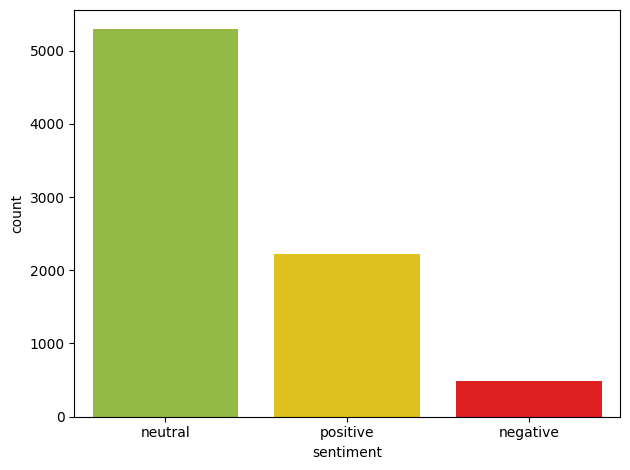

In [22]:
plot_y_discrete(df.sentiment)

In [23]:
X = sentence_embeddings
y_text = df.sentiment.values
le = preprocessing.LabelEncoder()
le.fit(y_text)
print(f'Original classes {le.classes_}')
print(f'Corresponding numeric classes {le.transform(le.classes_)}')
y =le.transform(y_text)
print(f"X: {X.shape}")
print(f"y: {y.shape} {np.unique(y)}")
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

datasets = [
    [X_train, y_train],
    [X_val, y_val]
]
clf = linear_model.LogisticRegression(penalty=None, 
                                      dual=False, 
                                      tol=0.0001, 
                                      C=1.0, 
                                      fit_intercept=True, 
                                      intercept_scaling=1, 
                                      class_weight=None, # None, balanced
                                      random_state=None, 
                                      solver='lbfgs', 
                                      max_iter=1000, 
                                      multi_class='auto', 
                                      verbose=0, 
                                      warm_start=False, 
                                      n_jobs=None, 
                                      l1_ratio=None
                                     )

Original classes ['negative' 'neutral' 'positive']
Corresponding numeric classes [0 1 2]
X: (8000, 384)
y: (8000,) [0 1 2]


In [24]:
clf = clf.fit(X_train, y_train)

In [25]:
for split_name, dataset in zip(['train', 'validation'], datasets):
    X_i, y_i = dataset
    y_pred = clf.predict(X_i)
    print(f'\nSplit: {split_name}')
    print(skm.classification_report(y_i, y_pred))


Split: train
              precision    recall  f1-score   support

           0       0.75      0.53      0.62       395
           1       0.83      0.91      0.87      4200
           2       0.78      0.65      0.71      1805

    accuracy                           0.82      6400
   macro avg       0.79      0.70      0.73      6400
weighted avg       0.81      0.82      0.81      6400


Split: validation
              precision    recall  f1-score   support

           0       0.45      0.36      0.40        87
           1       0.83      0.89      0.86      1090
           2       0.70      0.60      0.64       423

    accuracy                           0.78      1600
   macro avg       0.66      0.61      0.63      1600
weighted avg       0.77      0.78      0.77      1600



In [26]:
# Run this to save a file with your predictions on the test set to be submitted
sentences_test = list(df_test.words_str.values)
X_test = model.encode(sentences_test)
y_hat = clf.predict(X_test)

# Save the results with the format <TEAM_ID>__<SPLIT>_clf_pred.npy

directory = 'results'
np.save(os.path.join(directory, f'{team_id}__{split}__clf_pred.npy'), y_hat)